# 2. Google Playstore Dataset

# Question 9 : Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

## Ans
-----

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

In [7]:
# Load the wine quality dataset
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
rows,cols = df.shape
print(f"total rows",rows)
print(f"total cols",cols)

total rows 10841
total cols 13


# Question 10 : How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.?

## Ans
-------

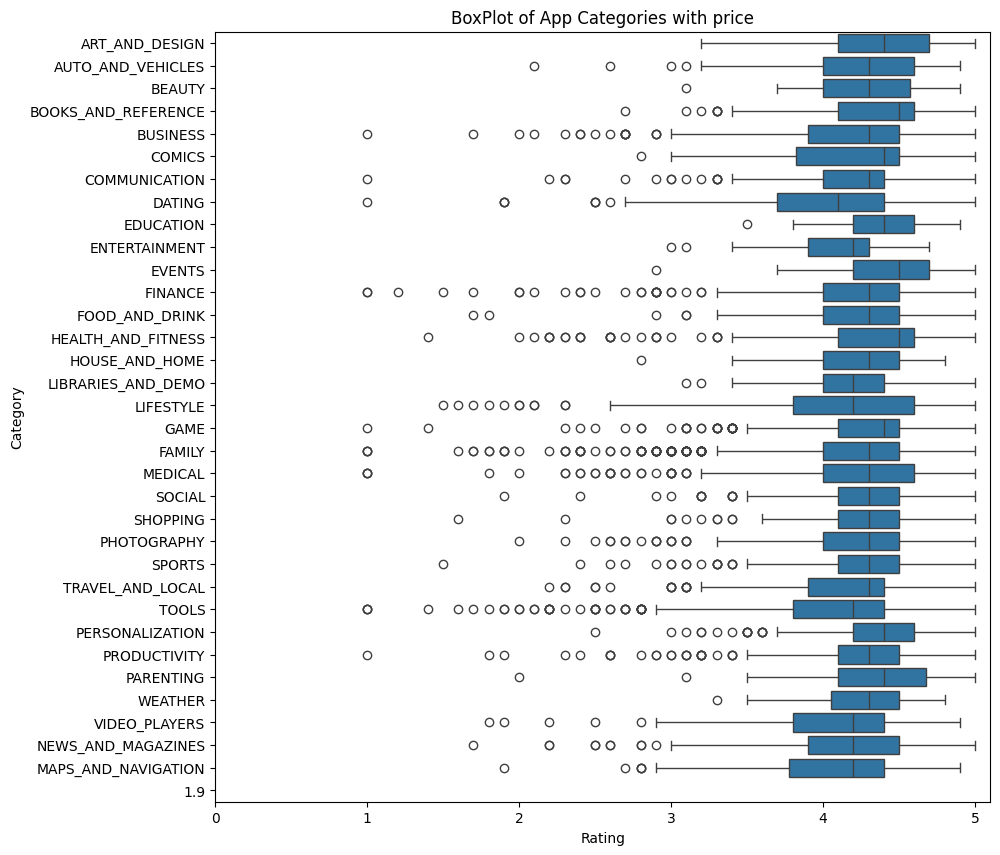

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Rating',y='Category')
plt.xlim([0,5.1])
plt.title('BoxPlot of App Categories with price')
plt.show()

# Question 11 : Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis./

# Ans
------

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Missing values in a dataset can impact analysis in multiple ways. Here are some potential consequences:

1. **Biased Analysis:** Missing data can lead to biased results, particularly if the missing values aren't missing completely at random (MCAR), but are instead missing in a systematic way (missingness depends on the value itself or on other variables). The bias might distort your analysis and conclusions.

2. **Reduced Statistical Power:** The reduction of sample size due to missing data might lead to a loss of statistical power. This could lead to wider confidence intervals and make it harder to detect significant effects or relationships in the data.

3. **Incorrect Interpretations:** Missing data can potentially alter the characteristics of the observed sample, leading to incorrect interpretations of the data, such as skewed mean values or misleading correlations.

4. **Inaccurate Models:** Missing data can cause issues when building predictive models or machine learning models. The models may get trained on incomplete, biased, or irrelevant data leading to poor generalization.

Example:
If the "Rating" field has missing values and these missing values are associated with older app versions, not having the "Rating" information might bias an analysis comparing older and newer versions of apps. This can skew interpretations of user feedback and app quality over time.

In the "Type" field, having a single missing value might not significantly impact analysis. Still, if this value was missing for a specific category or set of records, it could bias any analysis concerning app types.


# Question 12 : What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship ?

# Ans
-------
## First of fall Cleaning the (size) columns in dataset.

In [10]:
df_copy = df
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [11]:
# Convert all units into k
df_copy['Size'] = df_copy['Size'].str.replace('M','000')
df_copy['Size'] = df_copy['Size'].str.replace('k','')
df_copy['Size'] = df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size'] = df_copy['Size'].replace('1,000+','1')

# Convert datatype into float 
df_copy['Size'] = df_copy['Size'].astype(float)

In [12]:
df_copy['Rating'].idxmax()

10472

In [13]:
df_copy = df_copy.drop(10472)

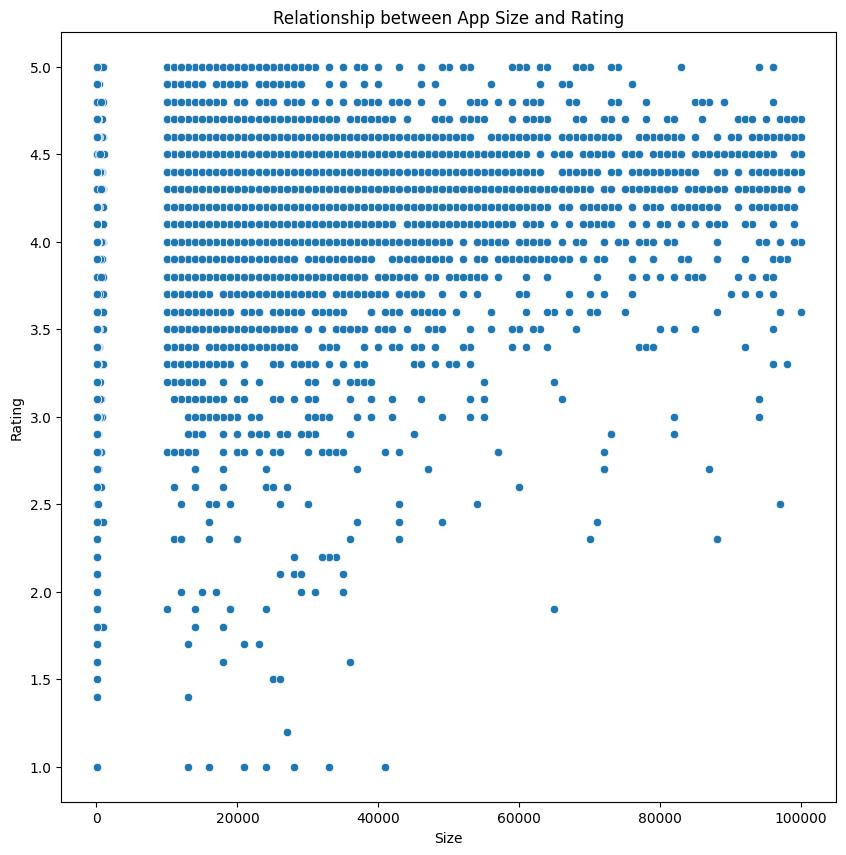

In [14]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Size', y='Rating', data=df_copy)
plt.title('Relationship between App Size and Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

In [15]:
df_copy.corr(numeric_only=True)

,Rating,Size
Rating,1.000000,0.082134
Size,0.082134,1.000000


# Question 13 : How does the type of app affect its price? Create a bar chart to compare average prices by app type

# Ans
------

In [16]:
# Cleaning Price Column
chars_to_remove = ['+',',','$']
for items in chars_to_remove:
    df_copy["Price"] = df_copy["Price"].str.replace(items,'',regex=False)      

In [17]:
df_copy["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

# Note is code ko modify krna hai

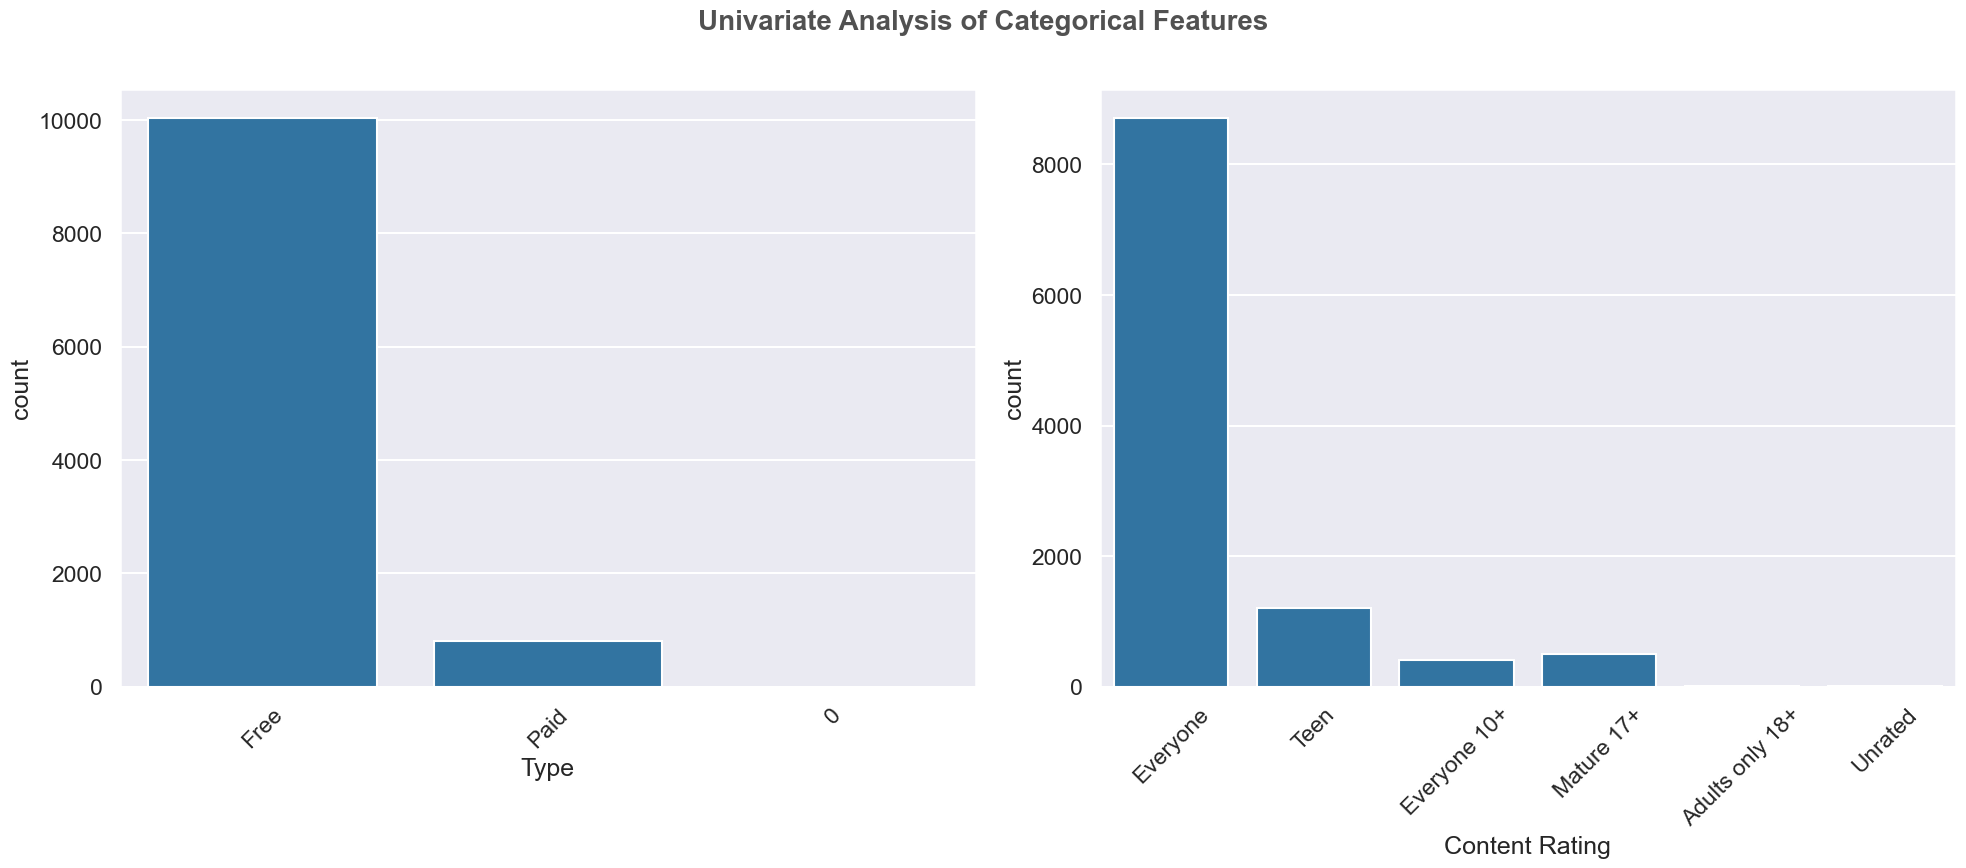

In [49]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]])
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Question 14 : What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

# Ans
------

In [19]:
# Cleaning Price Column
chars_to_remove = ['+',',']
for items in chars_to_remove:
    df_copy["Installs"] = df_copy["Installs"].str.replace(items,'',regex=False)     

In [20]:
df_copy["Installs"] = df_copy["Installs"].astype(int)   

In [21]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [22]:
df_copy['App'].duplicated().sum()

1181

In [23]:
df_copy = df_copy.drop_duplicates(subset = ['App'],keep='first')

In [41]:
## Top  10 App categories
category= pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns = {'Category':'Counts'},inplace = True)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

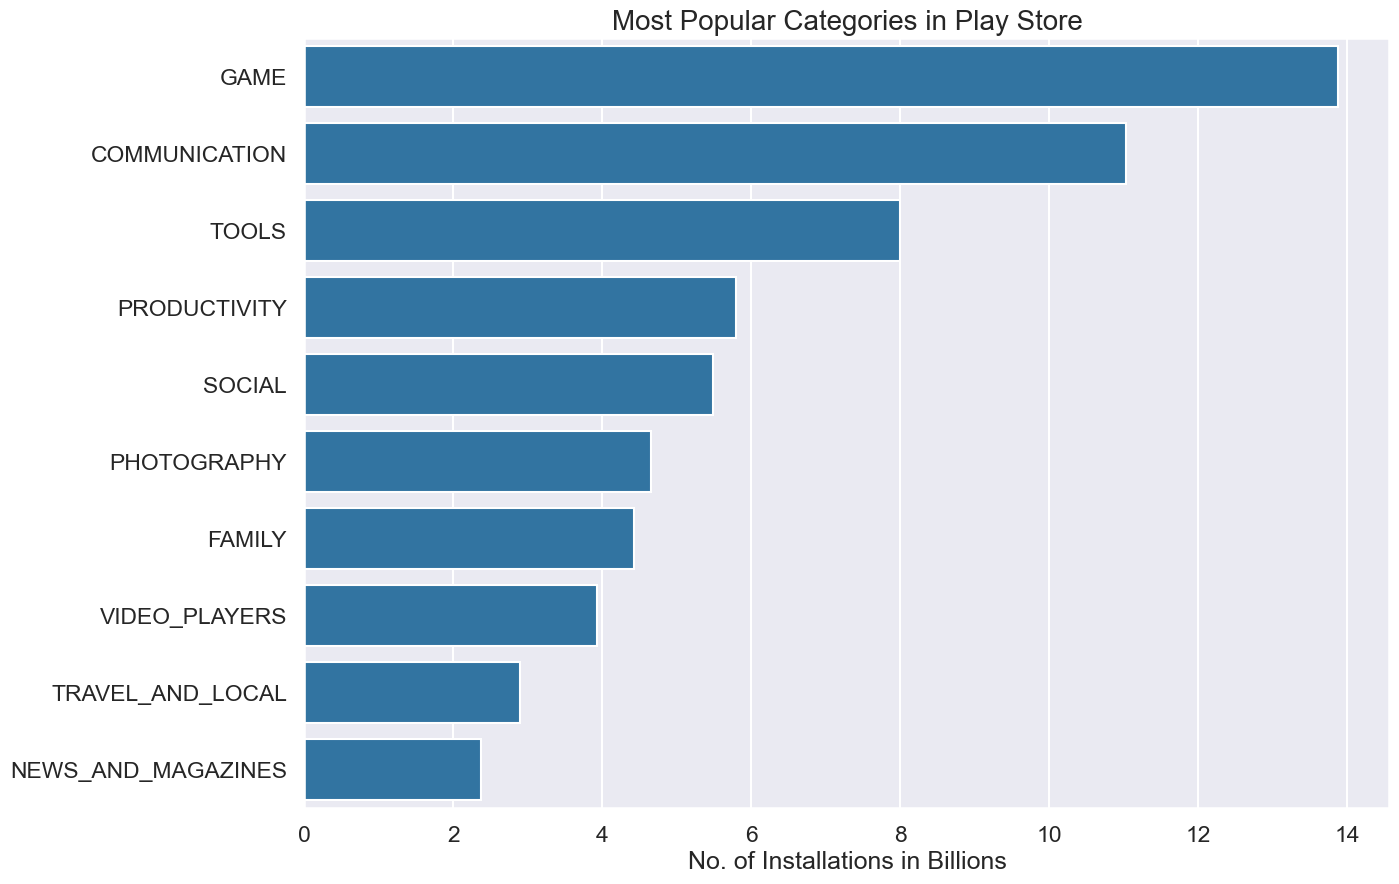

In [43]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [ ]:
top_10_apps = df_copy.sort_values(by=['Installs','Rating'],ascending=False).head(10)[['App','Installs','Rating']]
top_10_apps

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
336,WhatsApp Messenger,1000000000,4.4
3234,Google,1000000000,4.4
3454,Google Drive,1000000000,4.4
338,Google Chrome: Fast & Secure,1000000000,4.3
340,Gmail,1000000000,4.3
865,Google Play Games,1000000000,4.3
3117,Maps - Navigate & Explore,1000000000,4.3


# Question 15 : A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [ ]:
df_copy["Category"].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: title={'center': 'Value Count of App Categories'}>

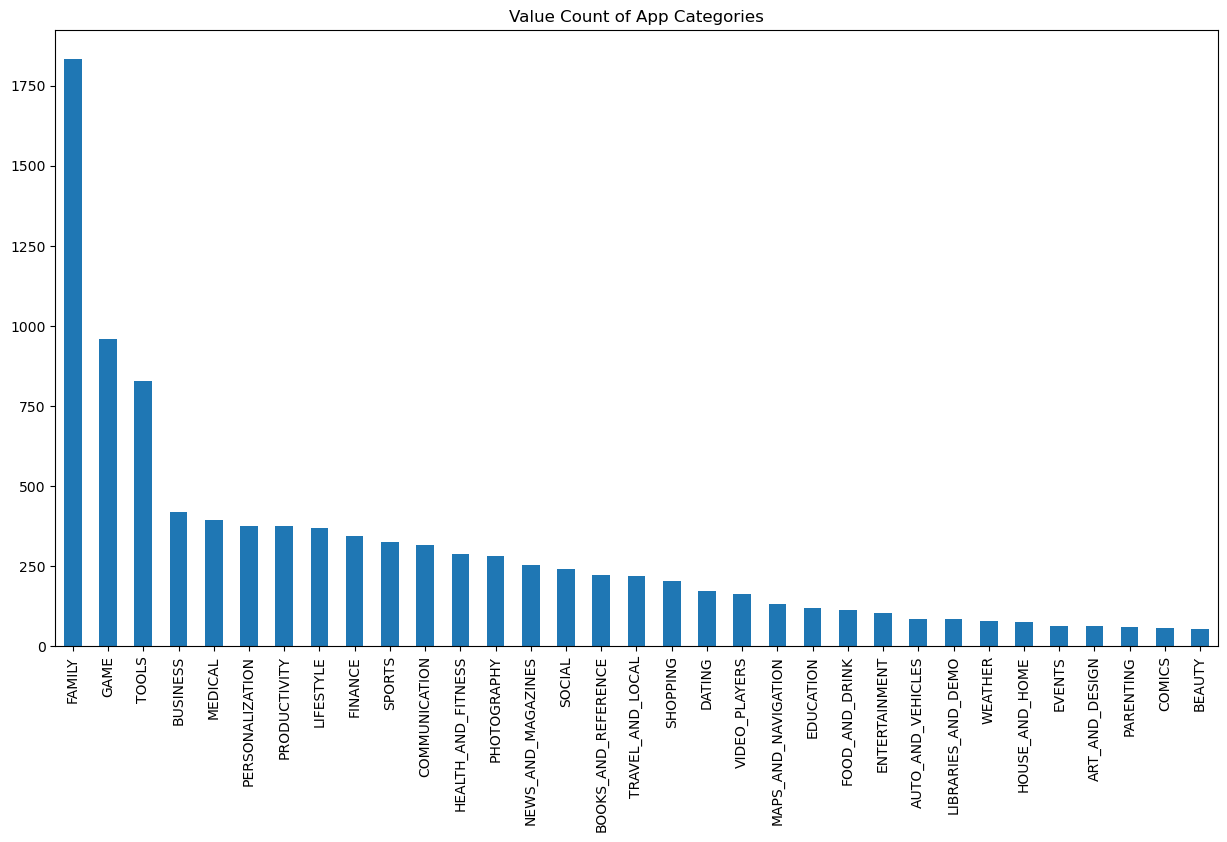

In [ ]:
df_copy['Category'].value_counts().plot(kind='bar',figsize=(15,8),title='Value Count of App Categories')

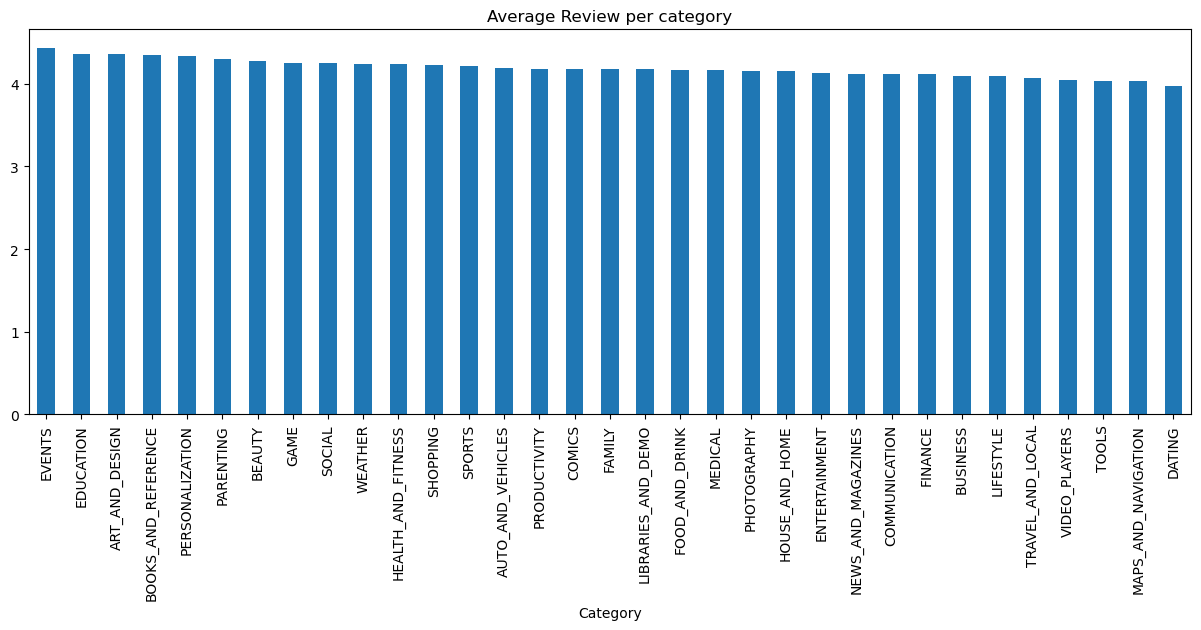

In [ ]:
ratings_by_category = df_copy.groupby(by='Category').mean(numeric_only=True)['Rating'].sort_values(ascending=False)
ratings_by_category.plot(kind='bar', title='Average Review per category', xlabel='Category', figsize=(15,5),)
plt.show()

<AxesSubplot: title={'center': 'Total Installs per category'}, xlabel='Category'>

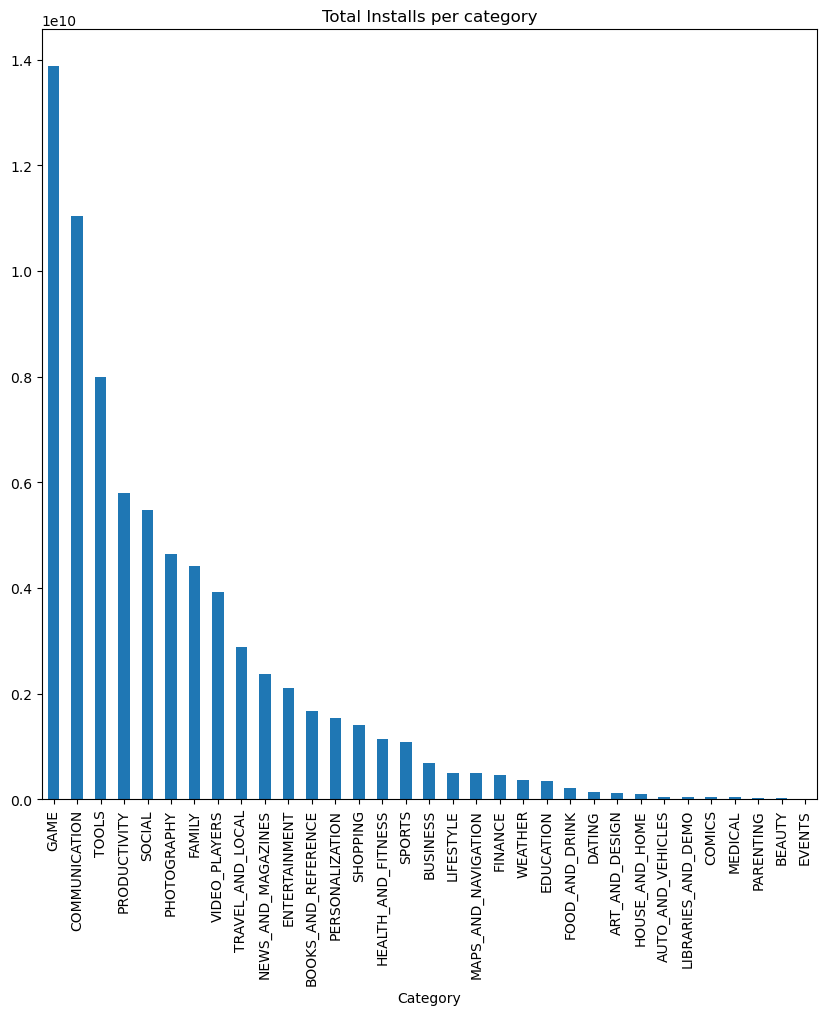

In [ ]:
df_copy.groupby(by='Category').sum(numeric_only=True)['Installs'].sort_values(ascending=False).plot(kind='bar',figsize=(10,10),
                                                                                   title='Total Installs per category')


In [34]:
# Group the data by 'Category' and find top 10 apps in each category based on installs
top_10_in_category = df_copy.groupby('Category').apply(lambda x: x.nlargest(10, 'Installs'))

# Reset the index to flatten the DataFrame and retain only necessary columns
top_10_in_category.reset_index(drop=True, inplace=True)
top_10_in_category = top_10_in_category[['App', 'Category', 'Installs', 'Rating']]
top_10_in_category

,App,Category,Installs,Rating
0,Sketch - Draw & Paint,ART_AND_DESIGN,50000000,4.5
1,Tattoo Name On My Photo Editor,ART_AND_DESIGN,10000000,4.2
2,ibis Paint X,ART_AND_DESIGN,10000000,4.6
3,Textgram - write on photos,ART_AND_DESIGN,10000000,4.4
4,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,10000000,4.7
...,...,...,...,...
325,MyRadar NOAA Weather Radar,WEATHER,10000000,4.5
326,Weather –Simple weather forecast,WEATHER,10000000,4.4
327,Yahoo Weather,WEATHER,10000000,4.4
328,Weather,WEATHER,10000000,4.2


In [ ]:
# Ignore font-related warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph .* missing from current font")
fig, axes = plt.subplots(6, 5, figsize=(30, 50))

# Get the top app in each category
top_apps_by_category = df_copy.groupby('Category')['App'].first()

for i, (category, apps) in enumerate(top_apps_by_category.items()):
    if i < 30:  # Ensure that we only create as many subplots as there are categories
        ax = axes[i // 5, i % 5]
        category_data = df_copy[df_copy['Category'] == category].nlargest(10, 'Installs')
        ax.bar(category_data['App'], category_data['Installs'], color='skyblue')
        ax.set_title(f'Top 10 Apps in {category}')
        ax.set_xlabel('App')
        ax.set_ylabel('Total Installs in millions')
        ax.tick_params(axis='x', rotation=90)
        ax2 = ax.twinx()
        ax2.plot(category_data['App'], category_data['Rating'], color='orange', marker='o')
        ax2.set_ylabel('Rating')
        ax2.grid(False)

plt.tight_layout()
plt.show()

![sample_plot (1).png](<attachment:sample_plot (1).png>)

# Question 16 : A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

## Ans
--------

To identify the most successful app developers in the Google Playstore dataset, several features can be considered for analysis. Here are some key features and the corresponding data visualizations that could aid in making recommendations to the company:

### Features for Analysis:

1. **Number of Installs:** This indicates the popularity and reach of an app.
2. **Ratings:** The higher the ratings, the better the user satisfaction.
3. **Reviews:** More reviews can indicate user engagement.
4. **App Size:** Large app sizes might deter users from downloading the app.
5. **Category:** Understanding the categories which are more successful.
6. **Type (Free or Paid):** Can show the developer's success in both models.

### Data Visualizations:

1. **Scatter Plots:** Use scatter plots to analyze the correlation between app size, number of installs, and ratings.
2. **Bar Charts:** Present a comparison of the average number of installs, ratings, or reviews across various app developers.
3. **Pie Charts:** Show the distribution of app categories for each developer.
4. **Box Plots:** Identify outliers or variations in the number of installs or ratings among different developers.
5. **Heatmaps:** Analyze correlations between different features and find clusters or patterns among developers.

### Recommendations:

1. **Identify High Performers:** Highlight developers with the highest number of installs, best ratings, and user engagement through reviews.
2. **Understand User Preferences:** Suggest categories that are more successful and trending for app development.
3. **Analyze Monetization:** Check the success ratio of free apps versus paid apps.
4. **Identify Niche Opportunities:** Find categories where competition is low and the potential for success is high.



In [ ]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [28]:
# Convert datatype into float 
df_copy['Reviews'] = df_copy['Reviews'].astype(float)

In [29]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

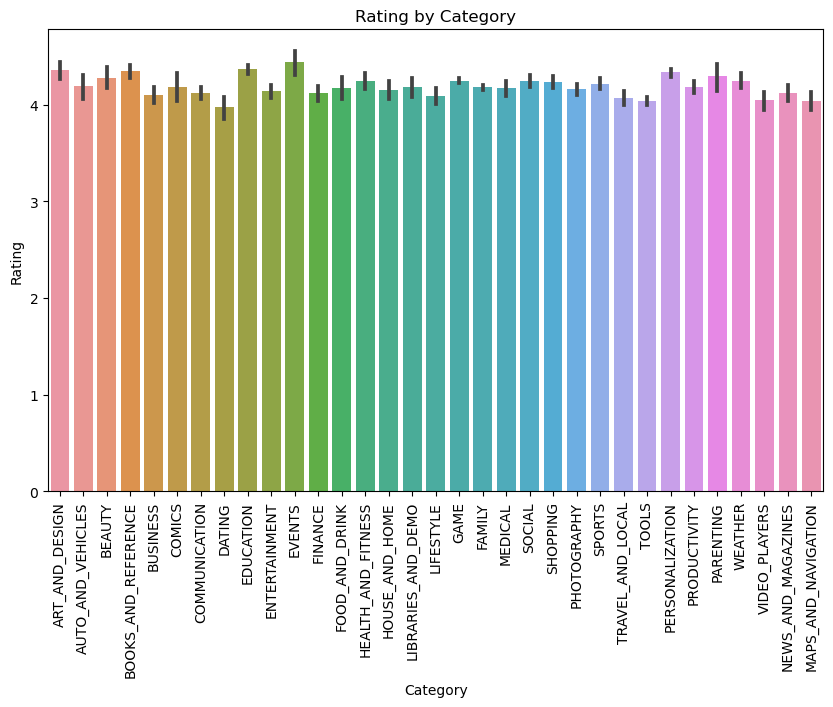

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Rating', data=df_copy)
plt.title('Rating by Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_copy['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<AxesSubplot: ylabel='Category'>

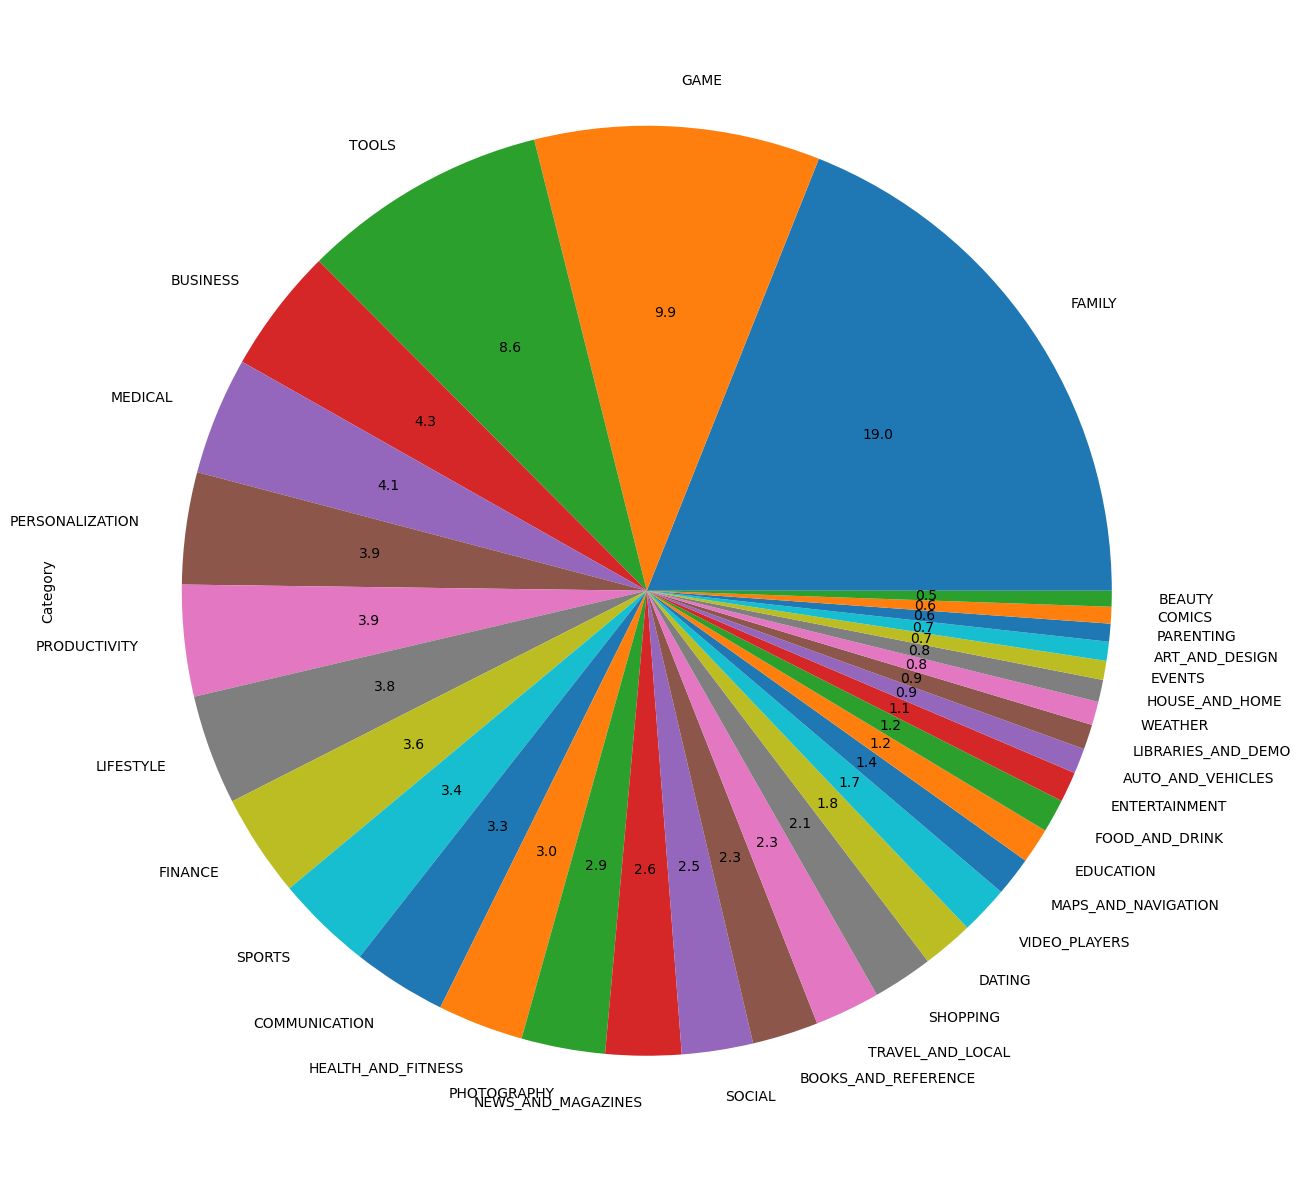

In [ ]:
df_copy['Category'].value_counts().plot.pie(y= df_copy['Category'],figsize = (15,16),autopct = "%1.1f")

# Queston 17 : A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

## Ans
------

In [ ]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [30]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [31]:
numeric_features  = [features for features in df_copy.columns if df_copy[features].dtype != 'O']
categoical_features  = [features for features in df_copy.columns if df_copy[features].dtype == 'O']
 
#print columns
print('we have {} numerical features : {} '.format(len(numeric_features),numeric_features))
print('we have {} categorical features : {} '.format(len(categoical_features),categoical_features))


we have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year'] 
we have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'] 


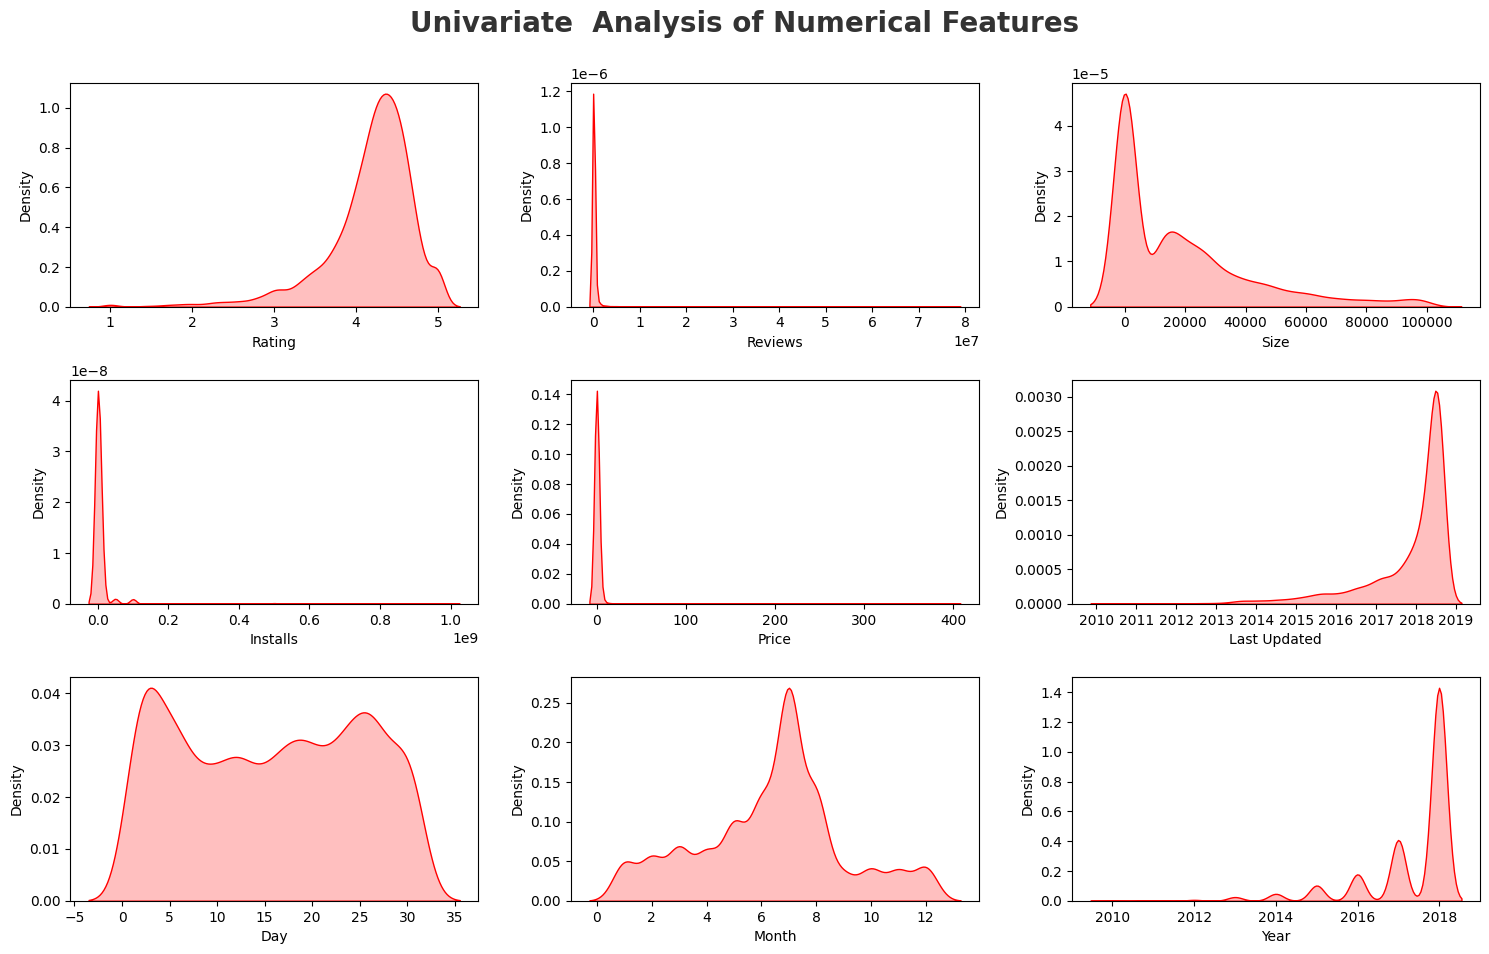

In [33]:
## Visualization Diagrams
## proportion of count data on numerical columns
plt.figure(figsize=(15,15))
plt.suptitle("Univariate  Analysis of Numerical Features", fontsize = 20,fontweight = "bold", alpha = 0.8,y=1.)

for i  in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df_copy[numeric_features[i]],fill =  True ,color = 'r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [51]:
# Grouping by Category, Month, and Year and summing up the number of installs
category_month_installs = df_copy.groupby(['Category', 'Year', 'Month'])['Installs'].sum().reset_index()

# Display the total installs for each Category, Month, and Year
category_month_installs.head(5)

,Category,Year,Month,Installs
0,ART_AND_DESIGN,2017,3,50000
1,ART_AND_DESIGN,2017,5,50000
2,ART_AND_DESIGN,2017,8,100000
3,ART_AND_DESIGN,2017,9,1000000
4,ART_AND_DESIGN,2017,10,1500000


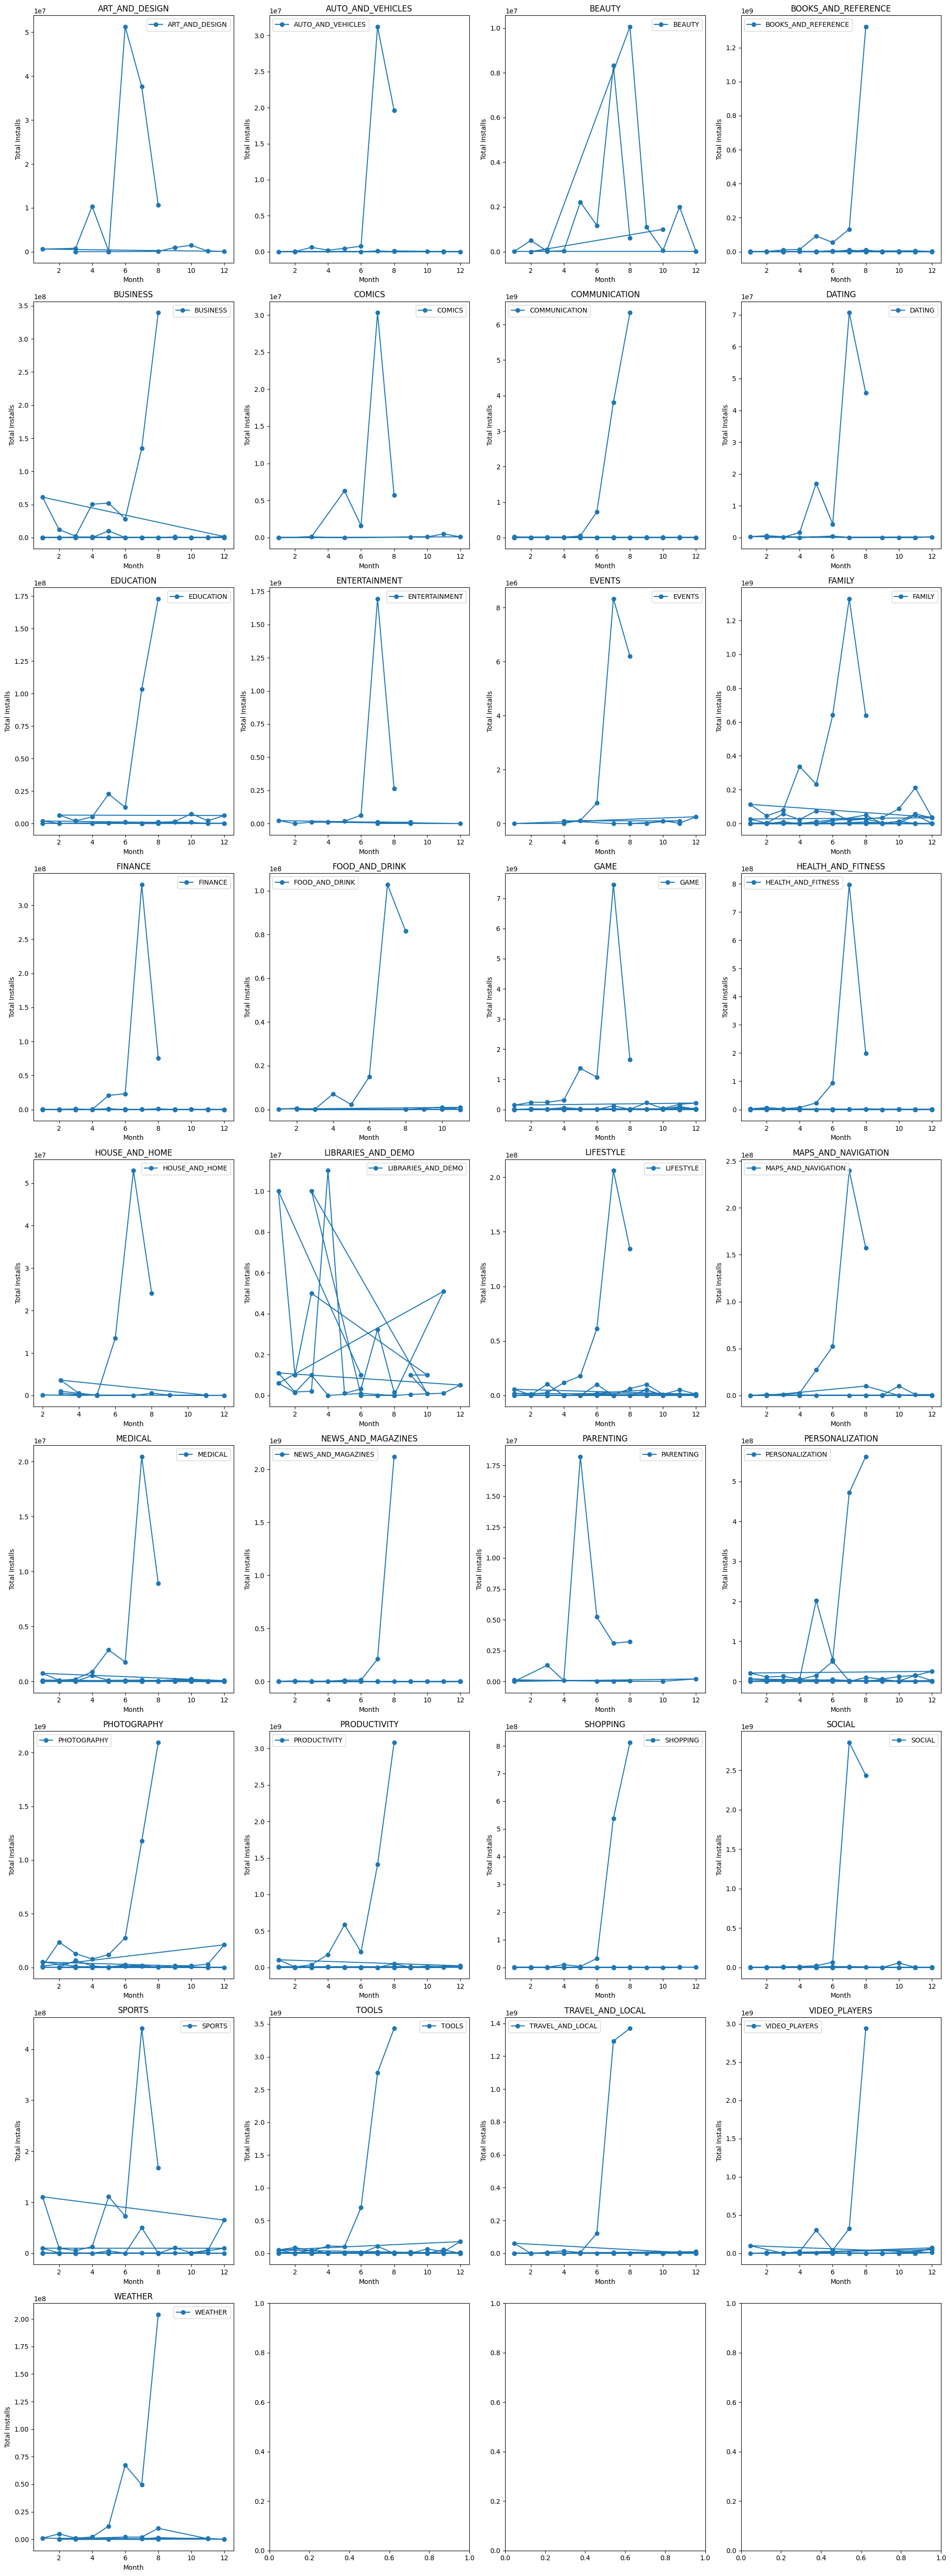

In [38]:
categories = category_month_installs['Category'].unique()
num_categories = len(categories)

# Adjusting the subplot configuration dynamically based on the number of categories
num_cols = 4  # Number of columns for subplots
num_rows = - (-num_categories // num_cols)  # Division rounded up

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))

for i, cat in enumerate(categories):
    row = i // num_cols
    col = i % num_cols
    category_data = category_month_installs[category_month_installs['Category'] == cat]
    axes[row, col].plot(category_data['Month'], category_data['Installs'], label=cat,marker='o')
    axes[row, col].set_title(cat)
    axes[row, col].set_xlabel('Month')
    axes[row, col].set_ylabel('Total Installs')
    axes[row, col].legend()

plt.tight_layout()
plt.show()